In [1]:
%load_ext pycodestyle_magic

In [2]:
%flake8_on

# PROJET 4 : Segmentation des clients d'un site e-commerce

## SOMMAIRE  <a class="anchor" id="sommaire"></a>
## [CONTEXTE DU PROJET](#1)<a class="anchor" id="sommaire"></a>
## [LES DONNEES DU PROJET](#2)<a class="anchor" id="sommaire"></a>
## [IMPORT DES LIBRAIRIES](#3)<a class="anchor" id="sommaire"></a>
## [MISSION 1: CHARGEMENT DES FICHIERS](#4)<a class="anchor" id="sommaire"></a>
### [M1-1 : Chargement des fichiers](#6)<a class="anchor" id="sommaire"></a>
### [M1-2 : Description des données ](#7)<a class="anchor" id="sommaire"></a>
### [M1-3 : Mis en évidence des points intéressants ](#8)<a class="anchor" id="sommaire"></a>
## [MISSION 2: NETTOYAGE DES DONNEES](#9)<a class="anchor" id="sommaire"></a>
### [M2-1 : Application des filtres ](#10)<a class="anchor" id="sommaire"></a>
## [MISSION 3 : FUSION DES DONNEES](#11)<a class="anchor" id="sommaire"></a>
### [M3-1 : Fusion des données](#12)<a class="anchor" id="sommaire"></a>
## [MISSION 4 : ENRICHISSEMENT](#13)<a class="anchor" id="sommaire"></a>
### [M4-1 : Enrichissement via des nouvelles variables](#14)<a class="anchor" id="sommaire"></a>
## [MiSSION 5 : ANALYSE](#15)<a class="anchor" id="sommaire"></a>
### [M5-1 : Analyse des variables quantitaives ](#16)<a class="anchor" id="sommaire"></a>
### [M5-2 : Transformation des variables ](#17)<a class="anchor" id="sommaire"></a>
## [SAUVEGARDE DES DONNEES](#18)<a class="anchor" id="sommaire"></a>


--------------------------------------------------------

## [CONTEXTE DU PROJET](#sommaire)<a class="anchor" id="1"></a>

Olist est une solution de vente sur les MarketPlaces en ligne, la mission consiste à leur fournir une segmentation de leur client en se basant sur la base des données disponible depuis janvier 2017.  


## [LES DONNEES DU PROJET](#sommaire)<a class="anchor" id="2"></a>

## [IMPORT DES LIBRAIRIES](#sommaire)<a class="anchor" id="3"></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from utils.functions import setCategoriesData
import os

In [4]:
# Configuration affichage
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## [MISSION 1 : CHARGEMENT DES FICHIERS](#sommaire)<a class="anchor" id="4"></a>

### [M1-1 : Chargement des fichiers](#sommaire)<a class="anchor" id="6"></a>

In [5]:
customers = \
    pd.read_csv('data/olist_customers_dataset.csv', sep=',', engine='python')
print('customers : ', customers.shape)

geolocation = \
    pd.read_csv('data/olist_geolocation_dataset.csv', sep=',', engine='python')
print('geolocation : ', geolocation.shape)

order_items = \
    pd.read_csv('data/olist_order_items_dataset.csv', sep=',', engine='python')
print('order_items : ', order_items.shape)

order_payments = \
    pd.read_csv('data/olist_order_payments_dataset.csv',
                sep=',', engine='python')
print('order_payments : ', order_payments.shape)

orders = \
    pd.read_csv('data/olist_orders_dataset.csv', sep=',', engine='python')
print('orders : ', orders.shape)

order_reviews = \
    pd.read_csv('data/olist_order_reviews_dataset.csv',
                sep=',', engine='python')
print('order_reviews : ', order_reviews.shape)

products = \
    pd.read_csv('data/olist_products_dataset.csv', sep=',', engine='python')
print('products : ', products.shape)

sellers = \
    pd.read_csv('data/olist_sellers_dataset.csv', sep=',', engine='python')
print('sellers : ', sellers.shape)

category_name_translation = \
    pd.read_csv('data/product_category_name_translation.csv',
                sep=',', engine='python')
print('category_name_translation : ', category_name_translation.shape)

customers :  (99441, 5)
geolocation :  (1000163, 5)
order_items :  (112650, 7)
order_payments :  (103886, 5)
orders :  (99441, 8)
order_reviews :  (100000, 7)
products :  (32951, 9)
sellers :  (3095, 4)
category_name_translation :  (71, 2)


### [M1-2 : Description des données : ](#sommaire)<a class="anchor" id="7"></a>

Pour connaitre plus en détails chaque table, nous allons regarder les champs qui les composent.

In [6]:
# Customers : Base des données des clients
# ///// Clé primaire : customer_id
# //// clé étrangère :
# Customers.customer_zip_code_prefix
# = geolocation.geolocation_zip_code_prefix
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
# geolocation : Base des données des géolocalisation
# //// Clé primaire : geolocation_zip_code_prefix
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [8]:
# order_items : Base des données des articles commandés
# //// Clé primaire : order_item_id + order_id
# //// clés étrangères : order_items.product_id
# = products.product_id
# et  order_items.seller_id = sellers.seller_id
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
# order_payments : Base des paiements de commande
# //// Clé primaire : order_id
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [10]:
# order_reviews : Base des avis de commande
# //// Clé primaire : review_id
# //// clé étrangère :
# order_reviews.order_id -> order_payments.order_id
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [11]:
# orders : Base des commandes
# //// Clé primaire : orders_id
# //// clé étrangère :
# orders.customer_id = customers.customer_id
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
# products : Base des produits
# //// Clé primaire : product_id
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [13]:
# sellers : Base des données des vendeurs
# //// Clé primaire : seller_id
# //// clé étrangère :
# sellers.seller_zip_code_prefix
# = geolocation.geolocation_zip_code_prefix
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [14]:
# category_name_translation :
# Base des traductions des noms de categories des produits
# category_name_translation.ï»¿product_category_name =
# products.product_category_name
category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ï»¿product_category_name       71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### [M1-3 : Mis en évidence et analyses des points intéressants :](#sommaire)<a class="anchor" id="8"></a>

### Répartition des clients par Etat :

Affichage de l'histogramme de client par Etat :


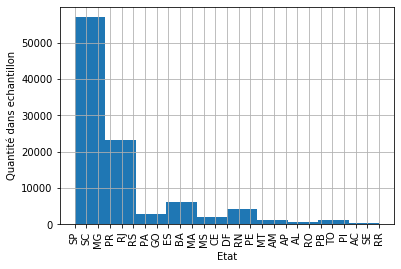

In [9]:
# Répartition des clients en fonctions en fonction de l'Etat :
customers['customer_state'].hist()
print("Affichage de l'histogramme de client par Etat :")
plt.xlabel('Etat')
plt.ylabel('Quantité dans echantillon')
plt.xticks(rotation=90)
plt.show()

In [16]:
NumberCustomers_GroupByState = customers.groupby('customer_state').size()
print(NumberCustomers_GroupByState)

customer_state
AC       81
AL      413
AM      148
AP       68
BA     3380
CE     1336
DF     2140
ES     2033
GO     2020
MA      747
MG    11635
MS      715
MT      907
PA      975
PB      536
PE     1652
PI      495
PR     5045
RJ    12852
RN      485
RO      253
RR       46
RS     5466
SC     3637
SE      350
SP    41746
TO      280
dtype: int64


Donc les deux plus grands Etats de bresil (Sao Polo et Rio de Janeiro) regroupent plus de 70 % des clients

### Différents status des commandes : 

Affichage de l'histogramme de statuts de commande :


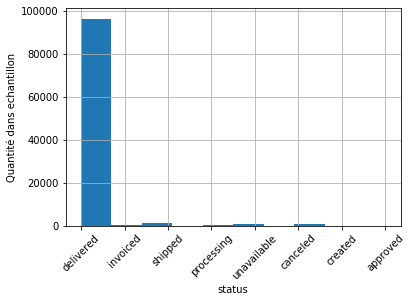

In [17]:
# Répartition des achats en fonctions en fonction du statut :
orders['order_status'].hist()
print("Affichage de l'histogramme de statuts de commande :")
plt.xlabel('status')
plt.ylabel('Quantité dans echantillon')
plt.xticks(rotation=45)
plt.show()

Donc on se posera la question si on gardera tous les status de commande pour la suite de l'analyse
Car la majorité sont en delivered et sinon les autres status sont des status temporaires avant d'être livré

In [18]:
orders_GroupByStatuts = orders.groupby('order_status').size()
print(orders_GroupByStatuts)

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
dtype: int64


### Périodes des achats :

In [19]:
debut = min(pd.to_datetime(orders['order_approved_at']).dt.date)
fin = max(pd.to_datetime(orders['order_approved_at']).dt.date)
print('Debut des achats : ', debut)
print('Fin des achats : ', fin)

Debut des achats :  2016-09-15
Fin des achats :  2018-09-03


Données entre sept 2016 et sept 2018, 
mais on se poser la question si on gardera toutes les périodes.

### Distribution des scores donnés par les consommateurs : 

Distribution des scores sur les commandes :


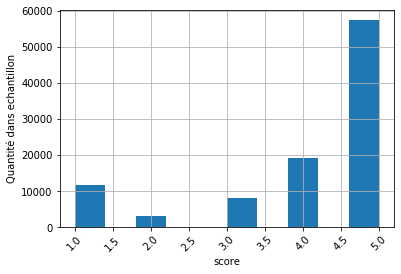

In [20]:
order_reviews["review_score"].hist()
print("Distribution des scores sur les commandes :")
plt.xlabel('score')
plt.ylabel('Quantité dans echantillon')
plt.xticks(rotation=45)
plt.show()

In [21]:
order_reviews_GroupByScore = order_reviews.groupby('review_score').size()
order_reviews_GroupByScore

review_score
1    11858
2     3235
3     8287
4    19200
5    57420
dtype: int64

### Nombre des commandes par jour :

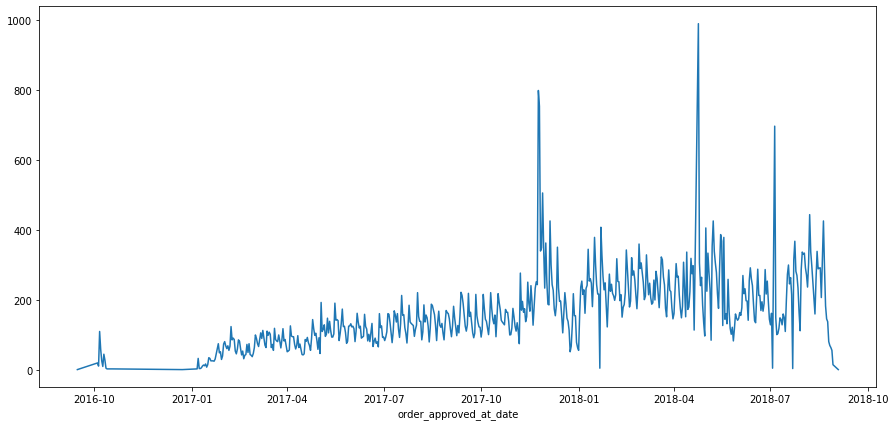

In [22]:
orders['order_approved_at_date'] = \
    pd.to_datetime(orders['order_approved_at']).dt.date

# Affichage des évolutions des nbr de commande entre sept2016 et sept2018
fig, ax = plt.subplots(figsize=(15, 7))
orders.groupby(['order_approved_at_date']).size().plot(ax=ax)

In [23]:
NumberOrders_GroupByDate = orders.groupby('order_approved_at_date').size()
print(NumberOrders_GroupByDate)

order_approved_at_date
2016-09-15      1
2016-10-04     20
2016-10-05     11
2016-10-06    110
2016-10-07     59
             ... 
2018-08-26     70
2018-08-27     64
2018-08-28     56
2018-08-29     15
2018-09-03      1
Length: 611, dtype: int64


On constate que les données à disposition commencent rééllement en janvier 2017 mais pas en sept 2016

### Répartition des achats :

In [26]:
# Les seuils des prix et frais de livraison :
print('Prix minimum : ', min(order_items['price']),
      ' /// maximm : ', max(order_items['price']))
print('Frais de livraison minimum : ', min(order_items['freight_value']),
      ' /// maximm : ', max(order_items['freight_value']))

Prix minimum :  0.85  /// maximm :  6735.0
Frais de livraison minimum :  0.0  /// maximm :  409.68


Affichage de l'histogramme de Prix :


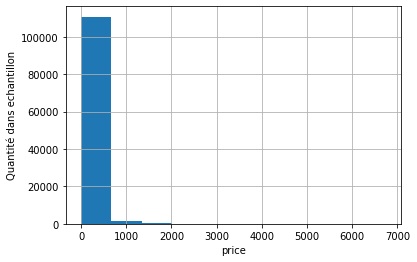

In [27]:
# Répartition des achats en fonctions du prix :
order_items['price'].hist()
print("Affichage de l'histogramme de " + str('Prix') + " :")
plt.xlabel('price')
plt.ylabel('Quantité dans echantillon')
plt.show()

In [10]:
print(order_items['price'].mean())

120.65373901477311


Affichage de l'histogramme de frais de livraison :


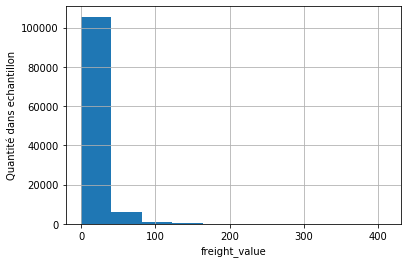

In [28]:
# Répartition des achats en fonctions des frais de livraison:
order_items['freight_value'].hist()
print("Affichage de l'histogramme de frais de livraison :")
plt.xlabel('freight_value')
plt.ylabel('Quantité dans echantillon')
plt.show()

## [MISSION 2 : NETTOYAGE DES DONNES](#sommaire)<a class="anchor" id="9"></a>

Il faut :
- Garder que le statut "delivered" car les autres sont des statuts temporaires ou pas significatifs
- Garder La periode d'achat à partir du 01/01/2017 car les ventes commencent rééllement à partir de cette date
- Score d'une commande : Si doublons de score sur order_id, faire une moyenne de score et ne garder qu'un order_id 
- Ne pas Garder la geolocalisation mais juste le nom de la ville et l'état 

### [M2-1 : Application des filtres ](#sommaire)<a class="anchor" id="10"></a>

In [35]:
# customers
# A supprimer : Rien
customers_copy = customers.copy()

# geolocation
# Ne pas Garder la geolocalisation mais juste le nom de la ville et l'état,
# donc à supprimer : geolocation_lat,geolocation_lng
geolocation_copy = geolocation.drop(columns=['geolocation_lat',
                                             'geolocation_lng'])

# order_items
# A supprimer : rien
order_items_copy = order_items.copy()

# order_payments
# regrouper par order_id et payment type :
# Si doublons faire une somme de montant et ne garder qu'un
order_payments_copy = \
    order_payments.groupby(['order_id', 'payment_type'])["payment_value"]\
    .sum().reset_index(name='Total payment_value')
order_payments_copy2 = \
    order_payments.groupby('order_id')["payment_value"].sum()\
    .reset_index(name='Total payment_value_Order')
order_payments_type = order_payments_copy.copy()
order_payments_type.drop(columns=['Total payment_value'],
                         inplace=True)

# order_reviews
# regrouper par order_id : Si doublons sur order_id,
# faire une moyenne de score et ne garder qu'un order_id
order_reviews_copy = \
    order_reviews.groupby('order_id')['review_score'].mean()\
    .reset_index()

# orders
# A supprimer : les commandes passées avant 01 janvier 2017 et
# ne garder que le status 'delivered'
orders_copy = orders.copy()
orders_copy = \
    orders[(orders['order_purchase_timestamp']
            >= '2017-01-01 00:00:00')
           & (orders['order_status'] == 'delivered')]

# products
# Recuperer la traduction des categorie de produit
products_copy = \
    pd.merge(products, category_name_translation,
             left_on='product_category_name',
             right_on='ï»¿product_category_name', how='inner')
# A supprimer les caracteristiques physiques des produits :
products_copy = products_copy\
    .drop(columns=['product_name_lenght', 'product_description_lenght',
                   'product_weight_g', 'product_length_cm',
                   'product_height_cm', 'product_width_cm',
                   'ï»¿product_category_name'])

# sellers
# A supprimer : Rien
sellers_copy = sellers.copy()

# category_name_translation
# A supprimer : Rien
category_name_translation_copy = category_name_translation.copy()

## [MISSION 3: FUSION DES DONNEES](#sommaire)<a class="anchor" id="11"></a>

### [M3-1 : Fusion des données](#sommaire)<a class="anchor" id="12"></a>

In [36]:
# Merge Orders and order_reviews : pour recuperer les scores de commande
OrdersMergeReviews =\
    pd.merge(orders_copy, order_reviews_copy,
             left_on='order_id', right_on='order_id', how='inner')

OrdersMergeReviews.shape

(96211, 10)

In [37]:
# And Merge customers
OrdersMergeReviewsMergeCustomers =\
    pd.merge(OrdersMergeReviews, customers_copy,
             left_on='customer_id', right_on='customer_id', how='inner')
OrdersMergeReviewsMergeCustomers.shape

(96211, 14)

In [38]:
# And Merge order_payments
OrdersMergeReviewsMergeCustomersMergePayments =\
    pd.merge(OrdersMergeReviewsMergeCustomers, order_payments_copy2,
             left_on='order_id', right_on='order_id', how='inner')
OrdersMergeReviewsMergeCustomersMergePaymentsType =\
    pd.merge(OrdersMergeReviewsMergeCustomersMergePayments,
             order_payments_type, left_on='order_id',
             right_on='order_id', how='inner')
NbrPaymentsTypeByOrder =\
    OrdersMergeReviewsMergeCustomersMergePaymentsType\
    .groupby('order_id')['payment_type'].count()\
    .reset_index(name='nbrPaymentType')
OrdersMergeReviewsMergeCustomersMergePaymentsType =\
    pd.merge(OrdersMergeReviewsMergeCustomersMergePaymentsType,
             NbrPaymentsTypeByOrder, left_on='order_id',
             right_on='order_id', how='inner')
OrdersMergeReviewsMergeCustomersMergePaymentsType.shape

(98388, 17)

In [39]:
# Merge products and OrderItem
OrderItemsMergeProducts =\
    pd.merge(order_items_copy, products_copy,
             left_on='product_id', right_on='product_id', how='inner')
OrderItemsMergeProducts.shape

(111023, 10)

In [40]:
# Orders Merge OrderItem : pour récuperer le details de chaque commande
AllData = pd.merge(OrderItemsMergeProducts,
                   OrdersMergeReviewsMergeCustomersMergePaymentsType,
                   left_on='order_id', right_on='order_id', how='inner')
AllData.shape

(110718, 26)

In [41]:
# AllData.info()

## [MISSION 4: ENRICHISSEMENT](#sommaire)<a class="anchor" id="13"></a>

### [M4-1 : Enrichissement via des nouvelles variables](#sommaire)<a class="anchor" id="14"></a>

#### Création des features pour les analyses :

In [42]:
# calcul de la durée de dernier achat :
AllDataRecenceByCustomer = \
    AllData.groupby('customer_id')['order_purchase_timestamp']\
    .max().reset_index(name='Last_order_date')
customers_Behaviour = pd.merge(customers_copy, AllDataRecenceByCustomer,
                               left_on='customer_id',
                               right_on='customer_id',
                               how='inner')

customers_Behaviour['max_date_order'] =\
    AllData['order_purchase_timestamp'].max()
# Formater les dates pour faire les calculs
customers_Behaviour.max_date_order = customers_Behaviour.max_date_order\
    .apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
customers_Behaviour.Last_order_date = customers_Behaviour.Last_order_date\
    .apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

# calcul de la recence (en jour) :
customers_Behaviour['recency_order'] =\
    (customers_Behaviour.max_date_order-customers_Behaviour.Last_order_date)
customers_Behaviour.recency_order = \
    abs(customers_Behaviour.recency_order
        .apply(lambda x: x.total_seconds()/86400)).astype(int)

In [43]:
# calcul de la fréquence d'achat :
AllDataFrequenceByCustomer =\
    AllData.groupby('customer_id').size().reset_index(name='frequency_order')
customers_Behaviour =\
    pd.merge(customers_Behaviour, AllDataFrequenceByCustomer,
             left_on='customer_id', right_on='customer_id', how='inner')
# customers_Behaviour.shape

In [44]:
# calcul de la dépense du client :
AllDataAmountByCustomer =\
    AllData.groupby('customer_id')['Total payment_value_Order']\
    .sum().reset_index(name='monetary_amount_order')
customers_Behaviour =\
    pd.merge(customers_Behaviour, AllDataAmountByCustomer,
             left_on='customer_id', right_on='customer_id', how='inner')
# customers_Behaviour.shape

In [45]:
# calcul de nombre de mois depuis premiere commande(durée arrondie en mois) :
FirstOrderByCustomer =\
    AllData.groupby('customer_id')['order_purchase_timestamp']\
    .min().reset_index(name='First_order_date')
customers_Behaviour =\
    pd.merge(customers_Behaviour, FirstOrderByCustomer,
             left_on='customer_id', right_on='customer_id', how='inner')
customers_Behaviour.First_order_date = customers_Behaviour.First_order_date.\
    apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

customers_Behaviour['duration_frequence_order'] =\
    (customers_Behaviour.max_date_order-customers_Behaviour.First_order_date)
customers_Behaviour.duration_frequence_order =\
    abs(customers_Behaviour.duration_frequence_order
        .apply(lambda x: x.total_seconds()/(86400*30))).astype(int)

customers_Behaviour.drop(columns=['Last_order_date',
                                  'max_date_order',
                                  'customer_zip_code_prefix'],
                         inplace=True)

In [46]:
# calcul de panier moyen du client :
customers_Behaviour['mean_value_order'] =\
    customers_Behaviour['monetary_amount_order']/customers_Behaviour['frequency_order']

In [47]:
# Calcul de satisfaction moyenne du client
# sur l'ensemble de ses commandes :
AllDataReviewScoreByCustomer =\
    AllData.groupby('customer_id')['review_score'].mean()\
    .reset_index(name='review_score_order')
customers_Behaviour = pd.merge(customers_Behaviour,
                               AllDataReviewScoreByCustomer,
                               left_on='customer_id',
                               right_on='customer_id',
                               how='inner')

In [48]:
# calcul des photos des produits achetés :
AllDataPhotosProductByCustomer =\
    AllData.groupby('customer_id')['product_photos_qty'].sum()\
    .reset_index(name='sum_product_photos_order')
customers_Behaviour =\
    pd.merge(customers_Behaviour, AllDataPhotosProductByCustomer,
             left_on='customer_id', right_on='customer_id', how='inner')
# calcul de nombre de produits des produits achetés :
AllDataNbrProductsByCustomer =\
    AllData.groupby('customer_id')['product_id'].size()\
    .reset_index(name='nbr_products_customer')
customers_Behaviour =\
    pd.merge(customers_Behaviour, AllDataNbrProductsByCustomer,
             left_on='customer_id', right_on='customer_id', how='inner')

In [49]:
# calcul de nombre des photos moyen par produit pour un consommateur :
customers_Behaviour['mean_number_photos'] = abs(
    customers_Behaviour['sum_product_photos_order']
    /
    customers_Behaviour['nbr_products_customer']).astype(int)
customers_Behaviour.drop(columns=['sum_product_photos_order',
                                  'nbr_products_customer'], inplace=True)

In [50]:
# AllData.payment_type.unique()

In [51]:
# Calcul de nombre de type de paiement differents :
AllDataPaymentsTypeByCustomer =\
    AllData.groupby(['customer_id',
                     'order_id'])['nbrPaymentType']\
    .max().reset_index(name='nbr_payments_type')
customers_Behaviour = pd.merge(customers_Behaviour,
                               AllDataPaymentsTypeByCustomer,
                               left_on='customer_id',
                               right_on='customer_id', how='inner')

In [52]:
# Ajout des colonnes categories regroupées dans notre Dataframe globale
product_categories_df = setCategoriesData()

AllData =\
    pd.merge(AllData, product_categories_df,
             left_on='product_category_name_english',
             right_on='category', how='inner')\
    .drop(columns=['category'])

gpCatAmountByCustomer =\
    AllData.groupby(['customer_id',
                     'product_category_group'])['Total payment_value_Order']\
    .sum().reset_index(name='Amount order By CategGroup')
# Liste de groupe des categories :
gpCatAmountByCustomer.product_category_group.unique()

array(['sports_leisure', 'health_beauty', 'home', 'furniture', 'fashion',
       'misc', 'construction', 'electronics', 'supplies', 'food_drink',
       'gifts'], dtype=object)

In [53]:
# Constituer les colonnes des CA du client par catégories:

customers_Final_Behaviour = customers_Behaviour.copy()

# Ajout de la colonne "Amount sports_leisure"
sports_leisure = \
    gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']
                          == 'sports_leisure']\
    .drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour,
                                     sports_leisure, left_on='customer_id',
                                     right_on='customer_id', how='left')
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup":
                                          "amount_sports_leisure"},
                                 inplace=True)

# Ajout de la colonne "Amount health_beauty" 
health_beauty = \
    gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']
                          == 'health_beauty']\
    .drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour,
                                     health_beauty, left_on='customer_id',
                                     right_on='customer_id', how='left')
customers_Final_Behaviour.rename(columns = {"Amount order By CategGroup":
                                          "amount_health_beauty"},
                                 inplace=True)

# Ajout de la colonne "Amount home"
home = \
    gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']
                          == 'home'].drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour,
                                     home, left_on='customer_id',
                                     right_on='customer_id', how='left')
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup":
                                          "amount_home"}, inplace=True)

# Ajout de la colonne "Amount furniture"
furniture = \
    gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']
                          == 'furniture']\
    .drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour,
                                     furniture, left_on='customer_id',
                                     right_on='customer_id', how='left')
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup":
                                          "amount_furniture"},
                                 inplace=True)

# Ajout de la colonne "Amount fashion"
fashion = \
gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']
                      == 'fashion'].drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour,
                                     fashion, left_on='customer_id',
                                     right_on='customer_id', how='left')
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup":
                                          "amount_fashion"},
                                 inplace=True)

# Ajout de la colonne "Amount misc"
misc = gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']
                             == 'misc']\
    .drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour,
                                     misc, left_on='customer_id',
                                     right_on='customer_id', how='left')
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup":
                                          "amount_misc"},
                                 inplace=True)

# Ajout de la colonne "Amount construction"
construction = \
    gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']
                                     == 'construction']\
    .drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour,
                                     construction, left_on='customer_id',
                                     right_on='customer_id', how='left')
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup":
                                          "amount_construction"},
                                 inplace=True)

# Ajout de la colonne "Amount electronics"
electronics = \
gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']
                                    == 'electronics']\
    .drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour,
                                     electronics, left_on='customer_id',
                                     right_on='customer_id', how='left')
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup":
                                          "amount_electronics"},
                                 inplace=True)

# Ajout de la colonne "Amount supplies"
supplies = \
    gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']
                                 == 'supplies']\
    .drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour,
                                     supplies, left_on='customer_id',
                                     right_on='customer_id', how='left')
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup":
                                          "amount_supplies"},
                                 inplace=True)

# Ajout de la colonne "Amount food_drink"
food_drink = \
    gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']
                                   == 'food_drink']\
    .drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour,
                                     food_drink, left_on='customer_id',
                                     right_on='customer_id', how='left')
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup":
                                          "amount_food_drink"},
                                 inplace=True)

# Ajout de la colonne "Amount gifts"
gifts = gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']
                              == 'gifts'].\
    drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour,
                                     gifts, left_on='customer_id',
                                     right_on='customer_id', how='left')
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup":
                                          "amount_gifts"},
                                 inplace=True)

customers_Final_Behaviour.shape

(94862, 25)

17:45: W291 trailing whitespace
25:41: E251 unexpected spaces around keyword / parameter equals
25:43: E251 unexpected spaces around keyword / parameter equals
26:43: E128 continuation line under-indented for visual indent
53:1: E122 continuation line missing indentation or outdented
76:38: E127 continuation line over-indented for visual indent
87:1: E122 continuation line missing indentation or outdented
88:37: E127 continuation line over-indented for visual indent
100:34: E127 continuation line over-indented for visual indent
112:36: E127 continuation line over-indented for visual indent


In [54]:
customers_Final_Behaviour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94862 entries, 0 to 94861
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               94862 non-null  object        
 1   customer_unique_id        94862 non-null  object        
 2   customer_city             94862 non-null  object        
 3   customer_state            94862 non-null  object        
 4   recency_order             94862 non-null  int32         
 5   frequency_order           94862 non-null  int64         
 6   monetary_amount_order     94862 non-null  float64       
 7   First_order_date          94862 non-null  datetime64[ns]
 8   duration_frequence_order  94862 non-null  int32         
 9   mean_value_order          94862 non-null  float64       
 10  review_score_order        94862 non-null  float64       
 11  mean_number_photos        94862 non-null  int32         
 12  order_id          

## [MISSION 5: ANALYSE](#sommaire)<a class="anchor" id="15"></a>

### [M5-1 : Analyse des variables quantitatives ](#sommaire)<a class="anchor" id="16"></a>

#### La matrice des corrélations :

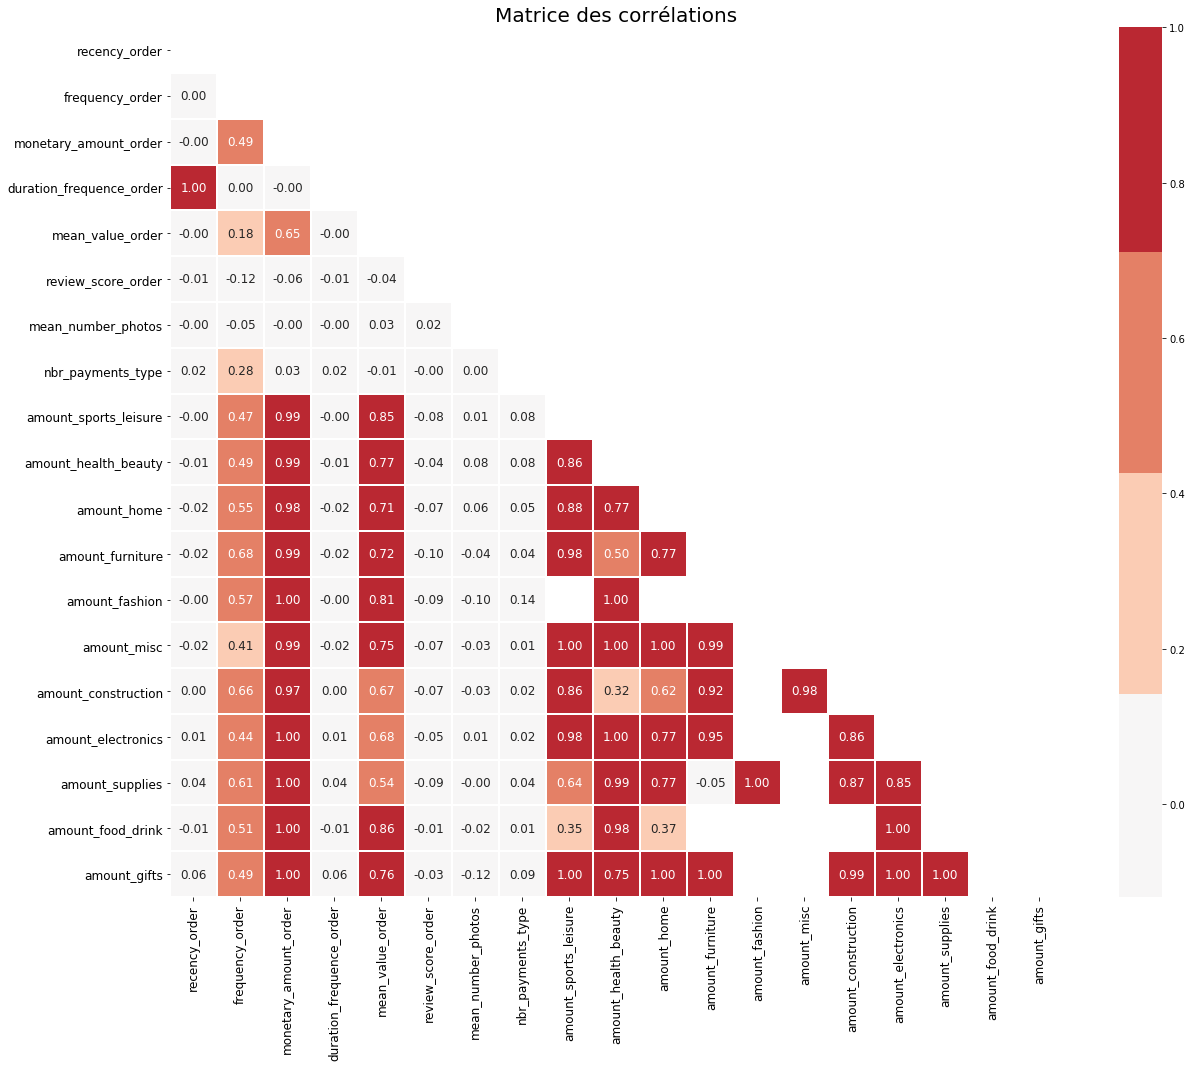

In [55]:
# Affichage de la matrice de correlation :
# Matrice des corrélations
corr = customers_Final_Behaviour.corr()
# heatmap de la matrice de corrélation
plt.figure(figsize=(20, 16))

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, center=0,
            cmap=sns.color_palette("RdBu_r", 7), linewidths=1,
            annot=True, annot_kws={"size": 12}, fmt=".02f")

plt.title('Matrice des corrélations', fontsize=20)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

Pour la partie analyse des données, je garderai toutes les variables même celles qui sont très correllées au cas ou on aura besoin de ces details d'informations dans nos segmentations plus tard.

Cette matrice me servira aussi pour identifier les colonnes à supprimer dans le notebook suivant.

#### La courbe de densité :

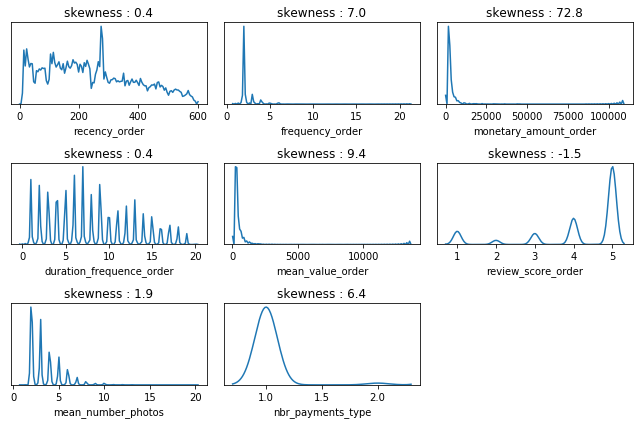

In [56]:
# Afficher la densité pour chaque variable quantitative,
# avec le coefficient skewness
lines = 3
cols = 3
df = customers_Final_Behaviour.select_dtypes(include='number').copy()
fig, ax = plt.subplots(lines, cols, figsize=(min(20, cols*3), lines*2))
listVarDensite = ['recency_order', 'frequency_order',
                  'monetary_amount_order',
                  'duration_frequence_order', 'mean_value_order',
                  'review_score_order', 'mean_number_photos',
                  'nbr_payments_type']

for i, val in enumerate(listVarDensite):
    bp = sns.distplot(df[val], hist=False, ax=ax[i//cols, i % cols],
                      kde_kws={'bw': 0.1})
    bp.set_title("skewness : "+str(round(df[val].skew(), 1)), fontsize=12)
    bp.set_yticks([])
    imax = i
for i in range(imax + 1, lines * cols):
    ax[i // cols, i % cols].axis('off')
    plt.tight_layout()
    plt.show()

Nous constatons des distributions non asymetriques grâce au coefficient de skewness : Ce coefficient évalue le défaut de symétrie d'une distribution. 

Nous devons faire des transformations de normalisation sur les variables dont le coefficient est supérieur à 2 en utilisant log


### [M5-2 : Transformation des variables ](#sommaire)<a class="anchor" id="17"></a>

Les transformations à faire sont :
- Normalisation des variables

#### Normalisation des variables :

In [1]:
#customers_Final_Behaviour.columns

In [58]:
# Normalisation des variables :

customers_Final_Behaviour_Log = customers_Final_Behaviour.copy()
listVarDensite = ['recency_order', 'frequency_order',
                  'monetary_amount_order',
                  'duration_frequence_order', 'mean_value_order',
                  'review_score_order', 'mean_number_photos',
                  'nbr_payments_type']
for j, val in enumerate(listVarDensite):
    # transformer les données pour le rendre normales
    # Les variables qui ont un coeeficient de skewness > 2
    if (customers_Final_Behaviour_Log[val].skew() > 2):
        customers_Final_Behaviour_Log[val] =\
            np.log(customers_Final_Behaviour_Log[val] + 1)
    else:
        customers_Final_Behaviour_Log[val] =\
            customers_Final_Behaviour_Log[val]
    jmax = j

customers_Final_Behaviour_Log.shape

(94862, 25)

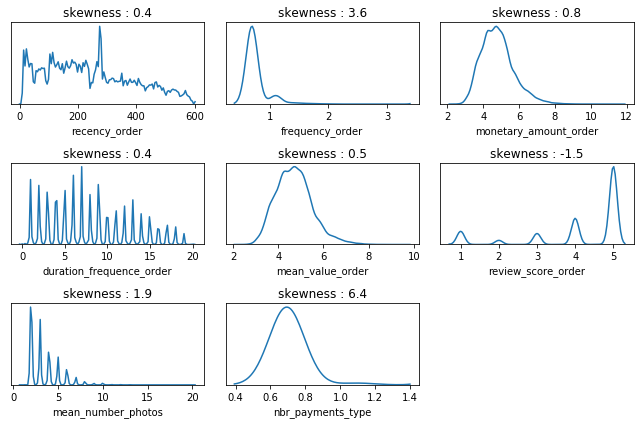

In [59]:
# Afficher la densité pour chaque variable quantitative,
# avec le coefficient skewness après la transformation
lines = 3
cols = 3
df = customers_Final_Behaviour_Log.select_dtypes(include='number').copy()
fig, ax = plt.subplots(lines, cols, figsize=(min(20, cols*3), lines*2))
listVarDensite = ['recency_order', 'frequency_order',
                  'monetary_amount_order',
                  'duration_frequence_order', 'mean_value_order',
                  'review_score_order', 'mean_number_photos',
                  'nbr_payments_type']

for i, val in enumerate(listVarDensite):
    bp = sns.distplot(df[val], hist=False, ax=ax[i//cols, i % cols],
                      kde_kws={'bw': 0.1})
    bp.set_title("skewness : "+str(round(df[val].skew(), 1)), fontsize=12)
    bp.set_yticks([])
    imax = i
for i in range(imax + 1, lines * cols):
    ax[i // cols, i % cols].axis('off')
    plt.tight_layout()
    plt.show()

## [SAUVEGARDE DES DONNEES](#sommaire)<a class="anchor" id="18"></a>

In [61]:
# Sauvegarde pour éviter de recharger toutes les données à chaque fois
file_df = 'data/final/customers_Final_Behaviour.csv'
file_AllData = 'data/final/AllData.csv'

if os.path.exists(file_df):
    os.remove(file_df)

customers_Final_Behaviour_Log.to_csv(file_df, sep='\t')
customers_Final_Behaviour_Log.shape

if os.path.exists(file_AllData):
    os.remove(file_AllData)

AllData.to_csv(file_AllData, sep='\t')